In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [238]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=0)
y = np.reshape(y, (y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

dimensions de X: (100, 2)
dimensions de y: (100, 1)


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [240]:
X = X_train; y = y_train

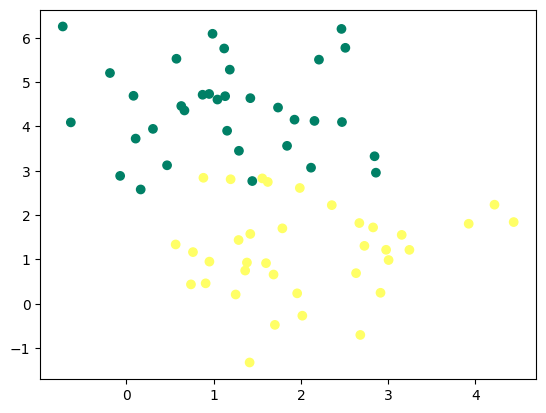

In [241]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

In [242]:
def initialisation(X):
  params = {}
  # Generate a 2-dimensional array with shape (2, 1)
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  params["W"] = W
  params["b"] = b
  return params

In [243]:
params = initialisation(X)
params

{'W': array([[-0.8494663],
        [ 2.0955049]]),
 'b': array([-0.24356045])}

In [244]:
# params["W"][0]
params["b"]

array([-0.24356045])

In [245]:
print(X[:, 0].min()); print(X[:, 0].max())

-0.7300001120785176
4.4384122962968195


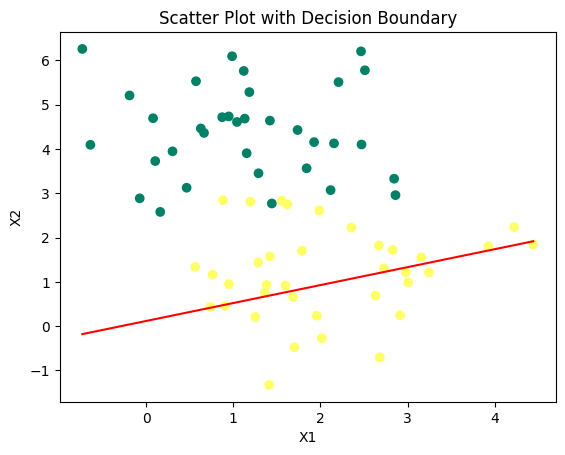

In [246]:
# initial model visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate the corresponding values ​​for the y axis using the decision line equation
# W1 * x1 + W2 * x2 + b = 0 => y = -(W1 * x1 + b) / W2
y_values = -(params["W"][0] * x_values + params["b"]) / params["W"][1]

plt.plot(x_values, y_values, c='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()

In [247]:
X.shape

(70, 2)

In [248]:
params["W"].shape

(2, 1)

In [249]:
params["b"].shape

(1,)

In [250]:
def model(X, params):
  Z = X.dot(params["W"]) + params["b"]
  return Z

In [251]:
Z = model(X, params)
Z.shape

(70, 1)

In [252]:
def activation(Z):
  return 1 / (1 + np.exp(-Z))

In [253]:
A = activation(Z)

In [254]:
A.shape

(70, 1)

In [255]:
def log_loss(y, A):
  return - 1 / len(y) * np.sum(y * np.log10(A) + (1 - y) * np.log10(1 - A))

In [256]:
err = log_loss(y, A)
err

1.8716904105966923

In [257]:
def gradients(X, y, A):
  grads = {}
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)

  grads["dW"] = dW
  grads["db"] = db

  return grads

In [258]:
grads = gradients(X, y, A)
grads

{'dW': array([[0.06233802],
        [1.99633222]]),
 'db': 0.26359740449554625}

In [259]:
def update(params, grads, learning_rate = 0.01):
  params["W"] = params["W"] - learning_rate * grads["dW"]
  params["b"] = params["b"] - learning_rate * grads["db"]

  return params

In [260]:
def predict(X, params):
  A = activation(model(X, params))
  print(A)
  return A >= 0.5

In [261]:
def artificial_neuron(X, y, epochs, learning_rate = 0.01):
  errors = []
  params = initialisation(X)

  for i in range(epochs):
    Z = model(X, params)
    A = activation(Z)
    err = log_loss(y, A)
    errors.append(err)
    #print(f"Epoch {i + 1}...................... log_loss: {err}")
    grads = gradients(X, y, A)
    params = update(params, grads, learning_rate)

  return errors, params

In [262]:
epochs = 1000
errors, params = artificial_neuron(X, y, epochs)

In [263]:
# final params
params

{'W': array([[ 0.65346808],
        [-1.25770742]]),
 'b': array([2.16998711])}

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
# Model performance
print(accuracy_score(y, predict(X, params)))

[[0.75357675]
 [0.358692  ]
 [0.86443839]
 [0.90708095]
 [0.76911629]
 [0.00781242]
 [0.89135678]
 [0.57949694]
 [0.90977543]
 [0.27584556]
 [0.8988813 ]
 [0.14261464]
 [0.00207969]
 [0.03072839]
 [0.94057403]
 [0.94010907]
 [0.06964369]
 [0.18180208]
 [0.42376287]
 [0.40889961]
 [0.97730716]
 [0.99189816]
 [0.89251434]
 [0.44370197]
 [0.06096396]
 [0.95907258]
 [0.92011136]
 [0.16681515]
 [0.01099432]
 [0.01769004]
 [0.04613512]
 [0.05012021]
 [0.07973365]
 [0.88739269]
 [0.04061757]
 [0.02468112]
 [0.83156407]
 [0.18940794]
 [0.76846315]
 [0.95359373]
 [0.76900605]
 [0.71314836]
 [0.01205797]
 [0.94756608]
 [0.03254571]
 [0.24849617]
 [0.04836885]
 [0.20252377]
 [0.92164365]
 [0.83554616]
 [0.03958863]
 [0.54601022]
 [0.12092586]
 [0.97869942]
 [0.70201783]
 [0.40897736]
 [0.92988514]
 [0.02419346]
 [0.89267482]
 [0.20979285]
 [0.03511965]
 [0.87027046]
 [0.05319212]
 [0.09443267]
 [0.93856024]
 [0.99150585]
 [0.46121864]
 [0.01287029]
 [0.97980668]
 [0.30426604]]
0.9285714285714286


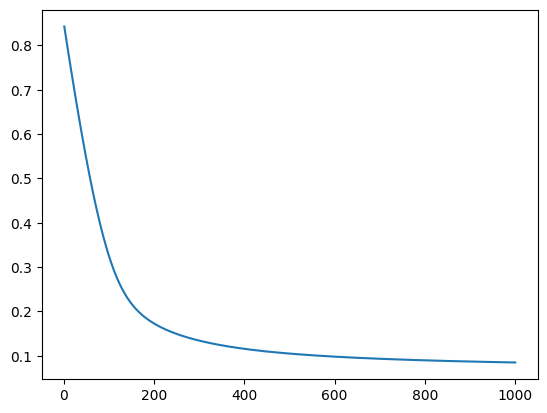

In [266]:
# Visualization of learning curve
plt.plot(np.arange(1, epochs+1), errors)
plt.show()

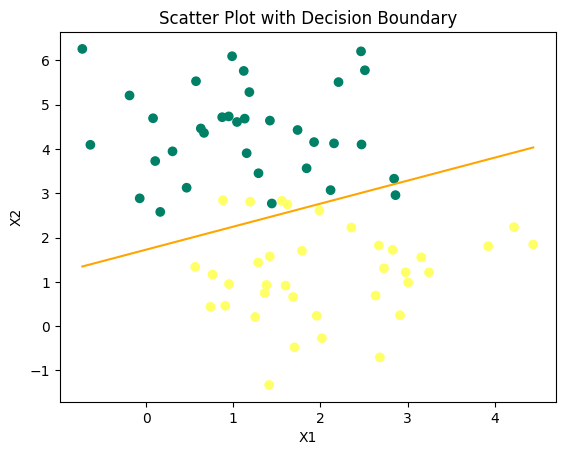

In [267]:
# final model visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(params["W"][0] * x_values + params["b"]) / params["W"][1]

plt.plot(x_values, y_values, c='orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundary')
plt.show()

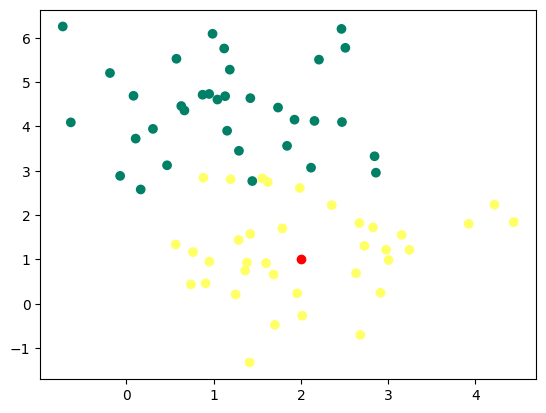

[0.90196188]


array([ True])

In [268]:
new_plant = np.array([2, 1])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, params)

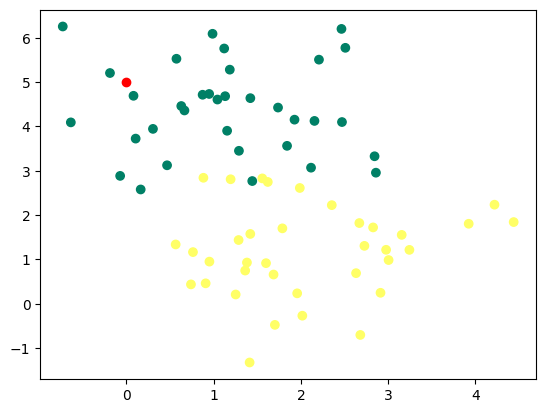

[0.01600767]


array([False])

In [269]:
new_plant = np.array([0, 5])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, params)

[[0.94963518]
 [0.96075883]
 [0.01211079]
 [0.04619407]
 [0.07154178]
 [0.97523632]
 [0.98877695]
 [0.0918926 ]
 [0.66983124]
 [0.00608808]
 [0.03694269]
 [0.59451468]
 [0.08416717]
 [0.03685618]
 [0.85551988]
 [0.98223756]
 [0.49002604]
 [0.94987166]
 [0.98232151]
 [0.07742535]
 [0.18531437]
 [0.00965238]
 [0.33318071]
 [0.95494773]
 [0.84478523]
 [0.01403199]
 [0.08789337]
 [0.62745077]
 [0.0094299 ]
 [0.70076627]]


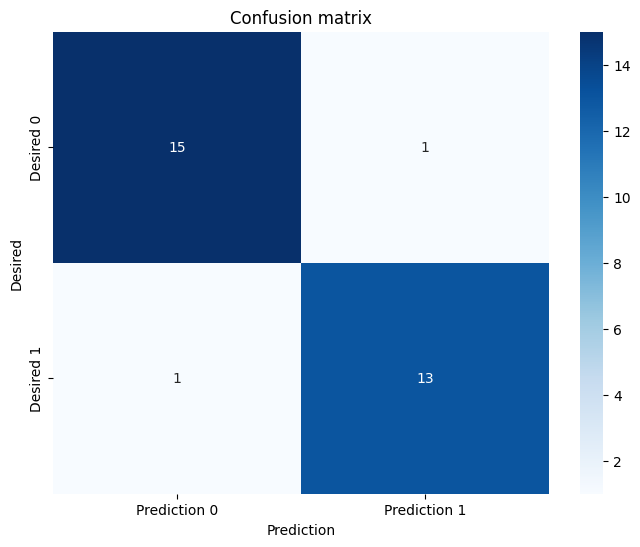

Accuracy score = 0.93


In [270]:
y_pred = predict(X_test, params)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Prediction 0', 'Prediction 1'], yticklabels=['Desired 0', 'Desired 1'])
plt.xlabel('Prediction')
plt.ylabel('Desired')
plt.title('Confusion matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score = {accuracy:.2f}")

# Comparaison with LinearRegression from sklearn

In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
model = LinearRegression()
model.fit(X, y)
y_pred_test = model.predict(X_test)

In [273]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_test) # Mean Squared Error "MSE"
rmse = np.sqrt(mse) # RMSE
mae = mean_absolute_error(y_test, y_pred_test) # Mean Absolute Error

print(f"Mean Squared Error (MSE) = {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) = {rmse:.2f}")
print(f"Mean Absolute Error (MAE) = {mae:.2f}")

Mean Squared Error (MSE) = 0.06
Root Mean Squared Error (RMSE) = 0.24
Mean Absolute Error (MAE) = 0.20


In [274]:
import plotly.graph_objects as go

In [275]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()